<a href="https://colab.research.google.com/github/pedrosoriaa1a/pago_multas/blob/main/Pago_de_multas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pago de multas 

## Librerias a usar

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import validation_curve
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

## Entendiendo los datos

### Cargando Dataset

In [151]:
df_train = pd.read_csv('train.csv', encoding='cp1252')
df_test = pd.read_csv('test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [152]:
df_train.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


### Sanity check

In [153]:
print("El dataset cuenta con {} registros y {} columnas".format(df_train.shape[0],df_train.shape[1]))

El dataset cuenta con 250306 registros y 34 columnas


In [154]:
# Informacipin sibre nustras variables y tipo de dato
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [155]:
# Valores nulos en el dataset 
df_train.isnull().sum()

ticket_id                          0
agency_name                        0
inspector_name                     0
violator_name                     34
violation_street_number            0
violation_street_name              0
violation_zip_code            250306
mailing_address_str_number      3602
mailing_address_str_name           4
city                               0
state                             93
zip_code                           1
non_us_str_code               250303
country                            0
ticket_issued_date                 0
hearing_date                   12491
violation_code                     0
violation_description              0
disposition                        0
fine_amount                        1
admin_fee                          0
state_fee                          0
late_fee                           0
discount_amount                    0
clean_up_cost                      0
judgment_amount                    0
payment_amount                     0
b

In [156]:
# Valores NA 
df_train.isna().sum()

ticket_id                          0
agency_name                        0
inspector_name                     0
violator_name                     34
violation_street_number            0
violation_street_name              0
violation_zip_code            250306
mailing_address_str_number      3602
mailing_address_str_name           4
city                               0
state                             93
zip_code                           1
non_us_str_code               250303
country                            0
ticket_issued_date                 0
hearing_date                   12491
violation_code                     0
violation_description              0
disposition                        0
fine_amount                        1
admin_fee                          0
state_fee                          0
late_fee                           0
discount_amount                    0
clean_up_cost                      0
judgment_amount                    0
payment_amount                     0
b

## Análisis exploratorio de los datos 

In [157]:
# Análisis de columnas con valores numéricos
df_train.describe()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [158]:
df_train.compliance.value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

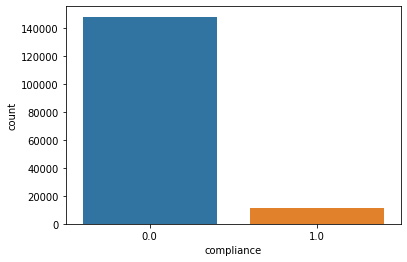

In [159]:
sns.countplot(data=df_train, x='compliance')

La variable objetivo está desbalanceada, hay *148283* personas que no han pagado sus multas mientras que hay un total de *11597* personas que si han pagado.

In [160]:
df_train.compliance.isna().sum()

90426

Por otro lado, encontramos *90,426* personas que no han sido encontradas responsables.

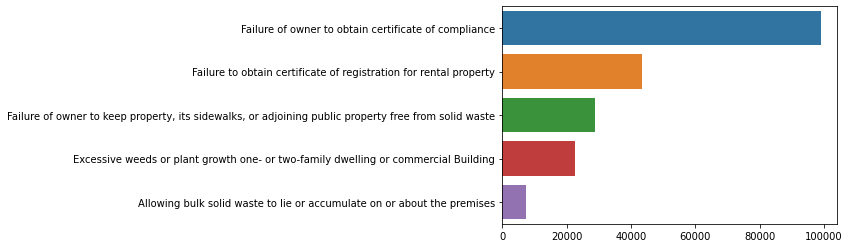

In [161]:
sns.barplot(y = df_train['violation_description'].value_counts()[:5].index, x = df_train['violation_description'].value_counts()[:5].values)

Como se observa en la gráfica, los primeros 5 puestos en infracciones son: 



1.   Incumplimiento del propietario de obtener el certificado de conformidad 
2.   No obtener el certificado de registro de la propiedad de alquiler  
3.   Incumplimiento por parte del propietario de mantener la propiedad, sus aceras o la propiedad pública colindante libre de residuos sólidos
4.  Crecimiento excesivo de malas hierbas o plantas Vivienda unifamiliar o bifamiliar o edificio comercial  
5.  Violación del límite de tiempo para que los contenedores aprobados permanezcan en la acera - temprano o tarde 



### Datos atípicos 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


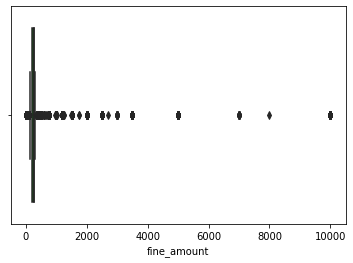

In [162]:
sns.boxplot(df_train['fine_amount'], color = 'green')

In [163]:
mayor_to_1000 = df_train[df_train['fine_amount'] > 1000]
print("Hay {} personas con montos de multas mayores a 1000 dólares".format(mayor_to_1000.shape[0]))

Hay 10391 personas con montos de multas mayores a 1000 dólares


In [164]:
print("El monto mayor de multa ha sido de {} dolares".format(df_train['fine_amount'].max()))

El monto mayor de multa ha sido de 10000.0 dolares


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


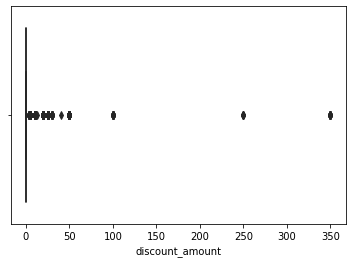

In [165]:
sns.boxplot(df_train['discount_amount'], color = 'green')

In [166]:
mayor_to_0 = df_train[df_train['fine_amount'] > 0]
print("Hay {} personas a las que sí se les aplicó un descuento".format(mayor_to_0.shape[0]))

Hay 250110 personas a las que sí se les aplicó un descuento


### Hipótesis basadas en la variable objetivo:  *compliance*

#### ¿El pago de la multa depende de la ciudad?

**Nota:** La ciudad de *Detroit* tiene varios errores en la escrituta que se corrigen con las líneas de abajo: 

In [167]:
df = df_train[df_train['city'].str.contains('DETROIT', case = False)]
lista = df.city.unique()

In [168]:
lista.tolist()

['Detroit',
 'DETROIT',
 'detroit',
 'detroitt',
 'DETROIT`',
 'DETROITdetroit',
 'dETROIT',
 'DETROIT,',
 'DETROITM',
 'DETROITI',
 'Detroitf',
 'DETROIT1',
 'DETROITQ',
 'detroit`',
 'EAST  DETROIT',
 'DETROITT',
 'DEtroit',
 'DETROIT, MI. 48206',
 'DETROIT, MI.',
 'WARRENDETROIT',
 'DETROITF',
 'detroit,mi',
 'Detroit`',
 'DETROIT  4',
 'Detroitli',
 'DETROITY',
 'DETROITL']

In [169]:
def cambio_detroit(ciudad):
  df_train['city'] = np.where(df_train['city'] == ciudad, 'DETROIT', df_train['city'])

In [170]:
for word in lista:
  cambio_detroit(word)

# df.apply()

In [171]:
df = df_train[df_train['city'].str.contains('DETROIT', case = False)]
lista = df.city.unique()
lista.tolist()

['DETROIT']

In [172]:
df_train['city'].value_counts()[:5]

DETROIT             151681
SOUTHFIELD           13436
DEARBORN              3637
FARMINGTON HILLS      2329
OAK PARK              2216
Name: city, dtype: int64

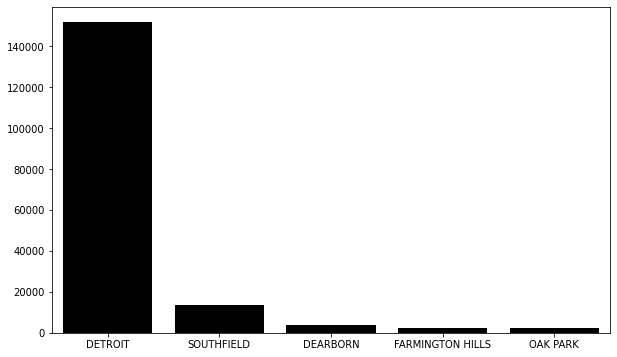

In [173]:
plt.figure(figsize = (10,6))
sns.barplot(y = df_train['city'].value_counts()[:5].values, x = df_train['city'].value_counts()[:5].index,
            color = 'black')

In [174]:
df_train['city'].value_counts()[:-5]

DETROIT                151681
SOUTHFIELD              13436
DEARBORN                 3637
FARMINGTON HILLS         2329
OAK PARK                 2216
                        ...  
RANCHO SANTA MARGAR         1
RANCO                       1
WOONSOCKE                   1
HARVEST                     1
DEERFILD BEACH              1
Name: city, Length: 5153, dtype: int64

Observamos que posiblemente el pago de la multa si dependa de la ciudad, ya que en detroit se hacen más multas que en otros estados en donde sólo se ha emitido una multa.

#### ¿El pago de la multa depende del monto de dicha multa? 

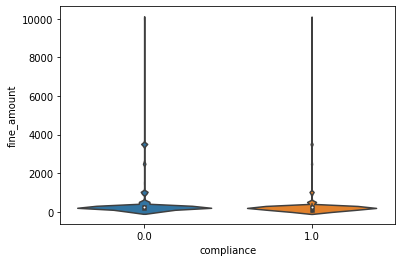

In [175]:
sns.violinplot(data = df_train, y = 'fine_amount', x = 'compliance')

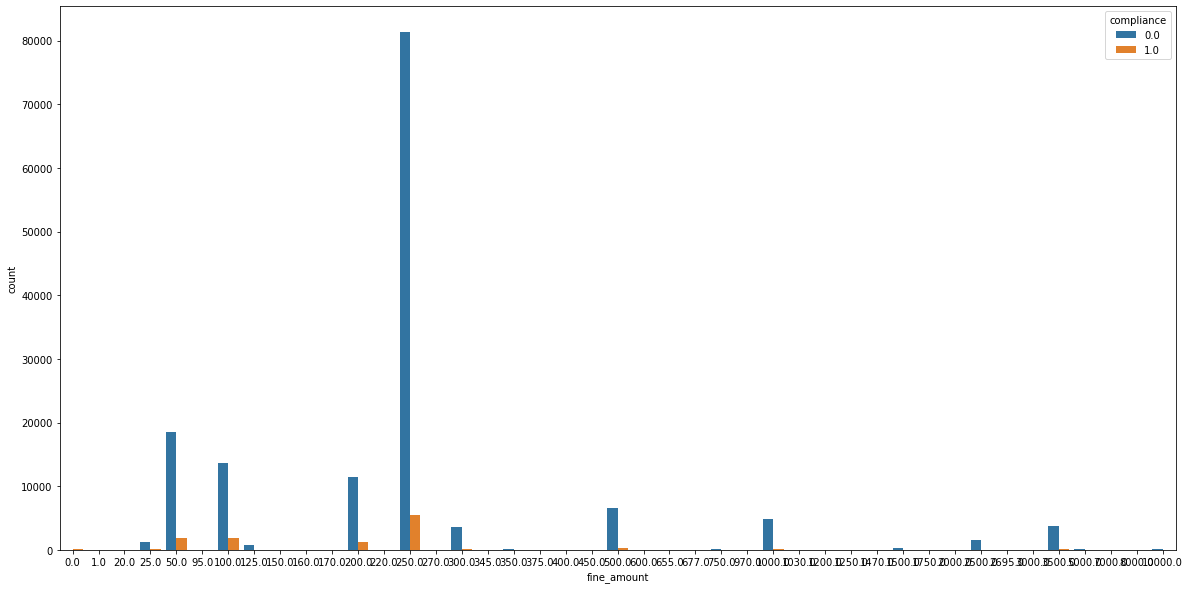

In [176]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_train, x = 'fine_amount', hue = 'compliance')

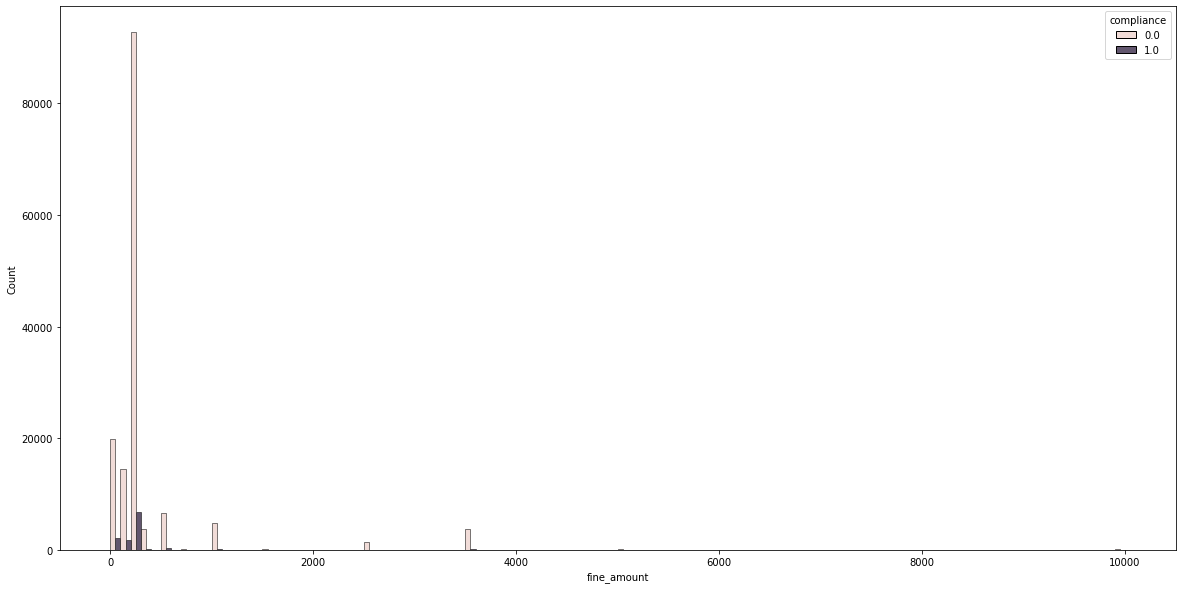

In [177]:
plt.figure(figsize=(20,10))
sns.histplot(data = df_train, x = 'fine_amount', hue = 'compliance', multiple = "dodge", binwidth = 100)
#plt.xlim(20,800)

In [178]:
rango_multas = df_train['fine_amount'].unique().tolist().sort()

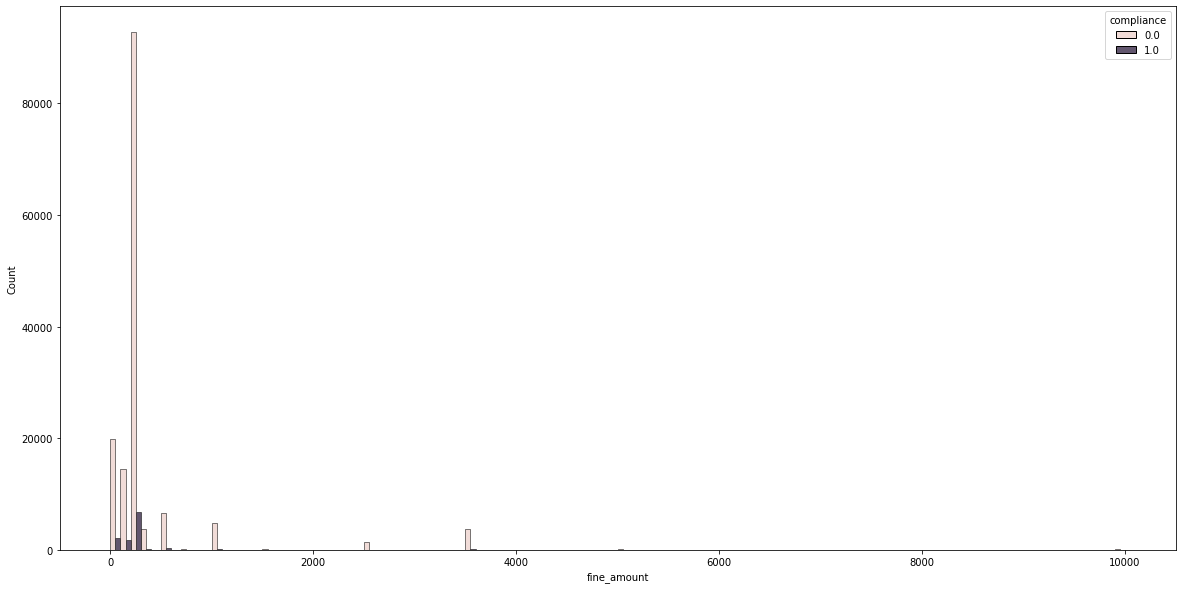

In [179]:
plt.figure(figsize=(20,10))
sns.histplot(data = df_train, x = 'fine_amount', hue = 'compliance', multiple = "dodge", binwidth = 100, bins = rango_multas)
#plt.xlim(20,1500)

Con estas tres gráficas se observa que el cobro de multa que más se emite es el de 250 dólares, siendo este monto el que más se paga.

#### ¿El pago de la multa depende de la agencia que emitió el ticket?

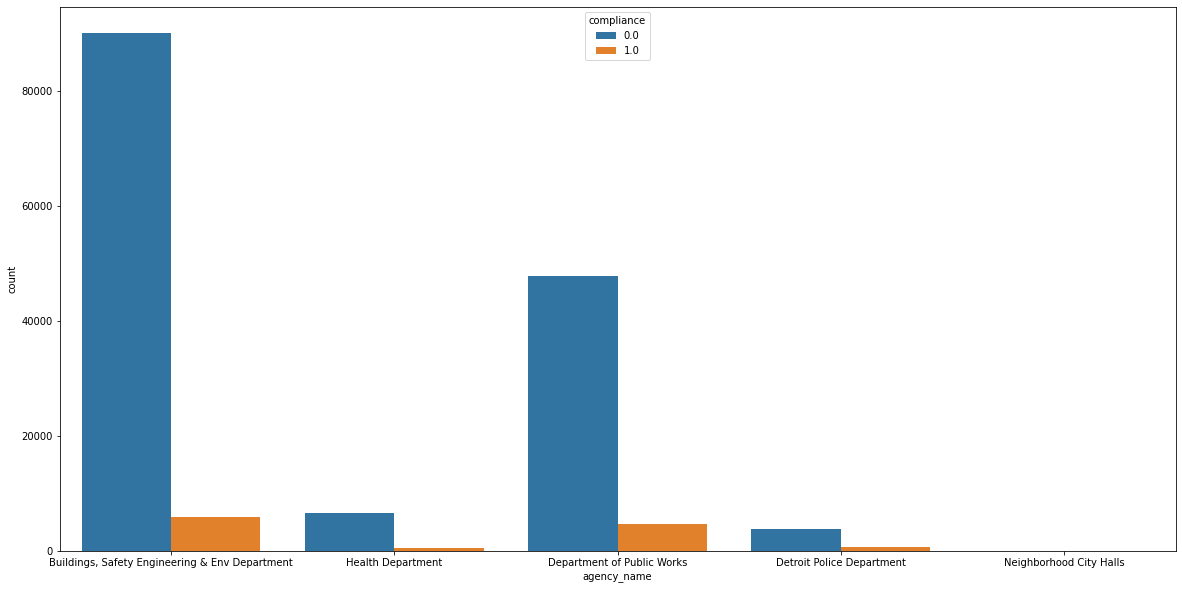

In [180]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_train, x = 'agency_name', hue = 'compliance')

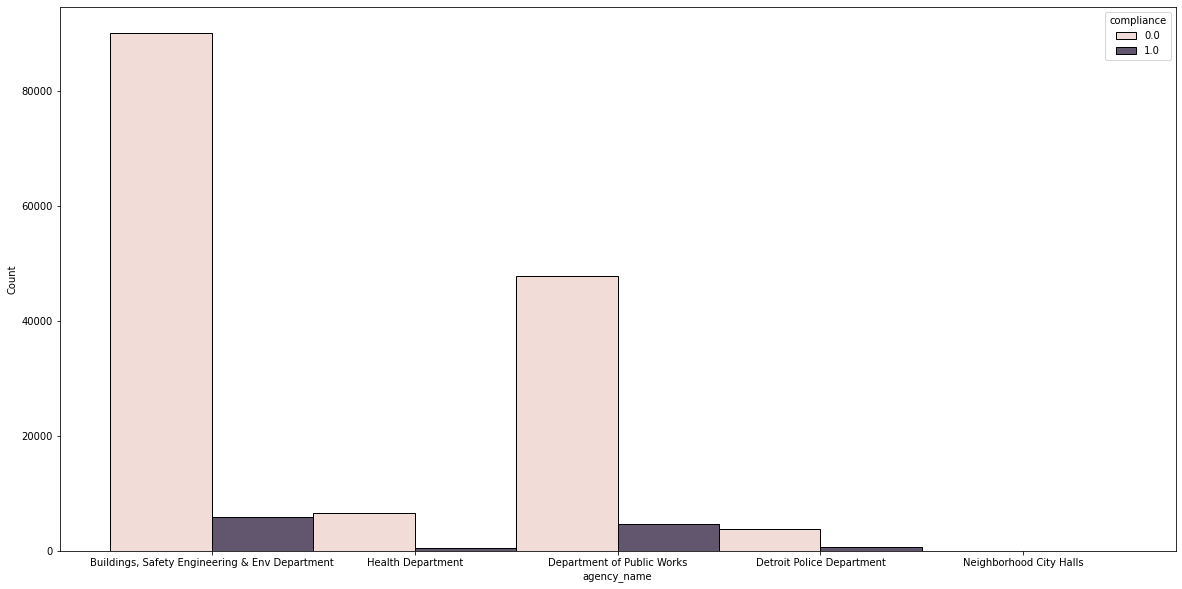

In [181]:
plt.figure(figsize=(20,10))
sns.histplot(data = df_train, x = 'agency_name', hue = 'compliance', multiple = "dodge")

In [182]:
agency_table = pd.crosstab(df_train['agency_name'], df_train['compliance'])
agency_table

compliance,0.0,1.0
agency_name,,
"Buildings, Safety Engineering & Env Department",90040,5823
Department of Public Works,47727,4718
Detroit Police Department,3876,588
Health Department,6639,468
Neighborhood City Halls,1,0


In [183]:
agency_table.astype("float").div(agency_table.sum(axis = 1), axis = 0)

compliance,0.0,1.0
agency_name,,
"Buildings, Safety Engineering & Env Department",0.939257,0.060743
Department of Public Works,0.910039,0.089961
Detroit Police Department,0.868280,0.131720
Health Department,0.934149,0.065851
Neighborhood City Halls,1.000000,0.000000


La agencia que más pagos de multas tiene es la de *Detroit Police Departament* con un *13%* del pago de dichas multas, siendo la cuarta agencia que más cantidad de multas levanta.

#### ¿El pago de la multa depende del tipo de infracción? 

In [184]:
pd.crosstab(df_train['violation_code'], df_train['compliance'])

compliance,0.0,1.0
violation_code,,
19420901,12,4
19450901,1575,45
19830901,10,0
19840901,1,1
19850901,1,0
...,...,...
9-1-82(d) - (Dwellin,444,13
9-1-82(d) - (Structu,15,2
9-1-83 - (Building 5,1,1


In [185]:
df_train['violation_code'].value_counts()[:6]

9-1-36(a)     99091
9-1-81(a)     43471
22-2-88       28720
9-1-104       22536
22-2-88(b)     7238
22-2-45        5394
Name: violation_code, dtype: int64

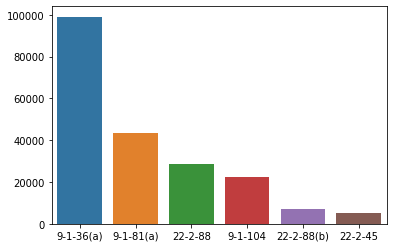

In [186]:
sns.barplot(x = df_train['violation_code'].value_counts()[:6].index, y = df_train['violation_code'].value_counts()[:6].values)

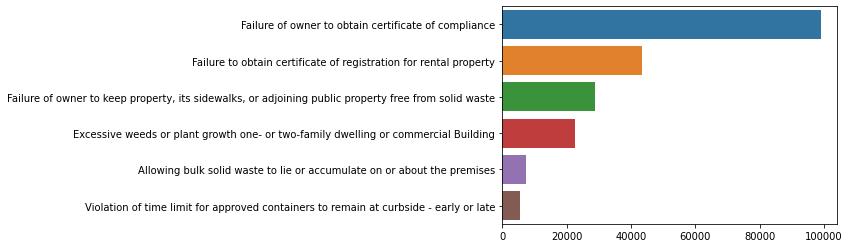

In [187]:

sns.barplot(y = df_train['violation_description'].value_counts()[:6].index, x = df_train['violation_description'].value_counts()[:6].values)

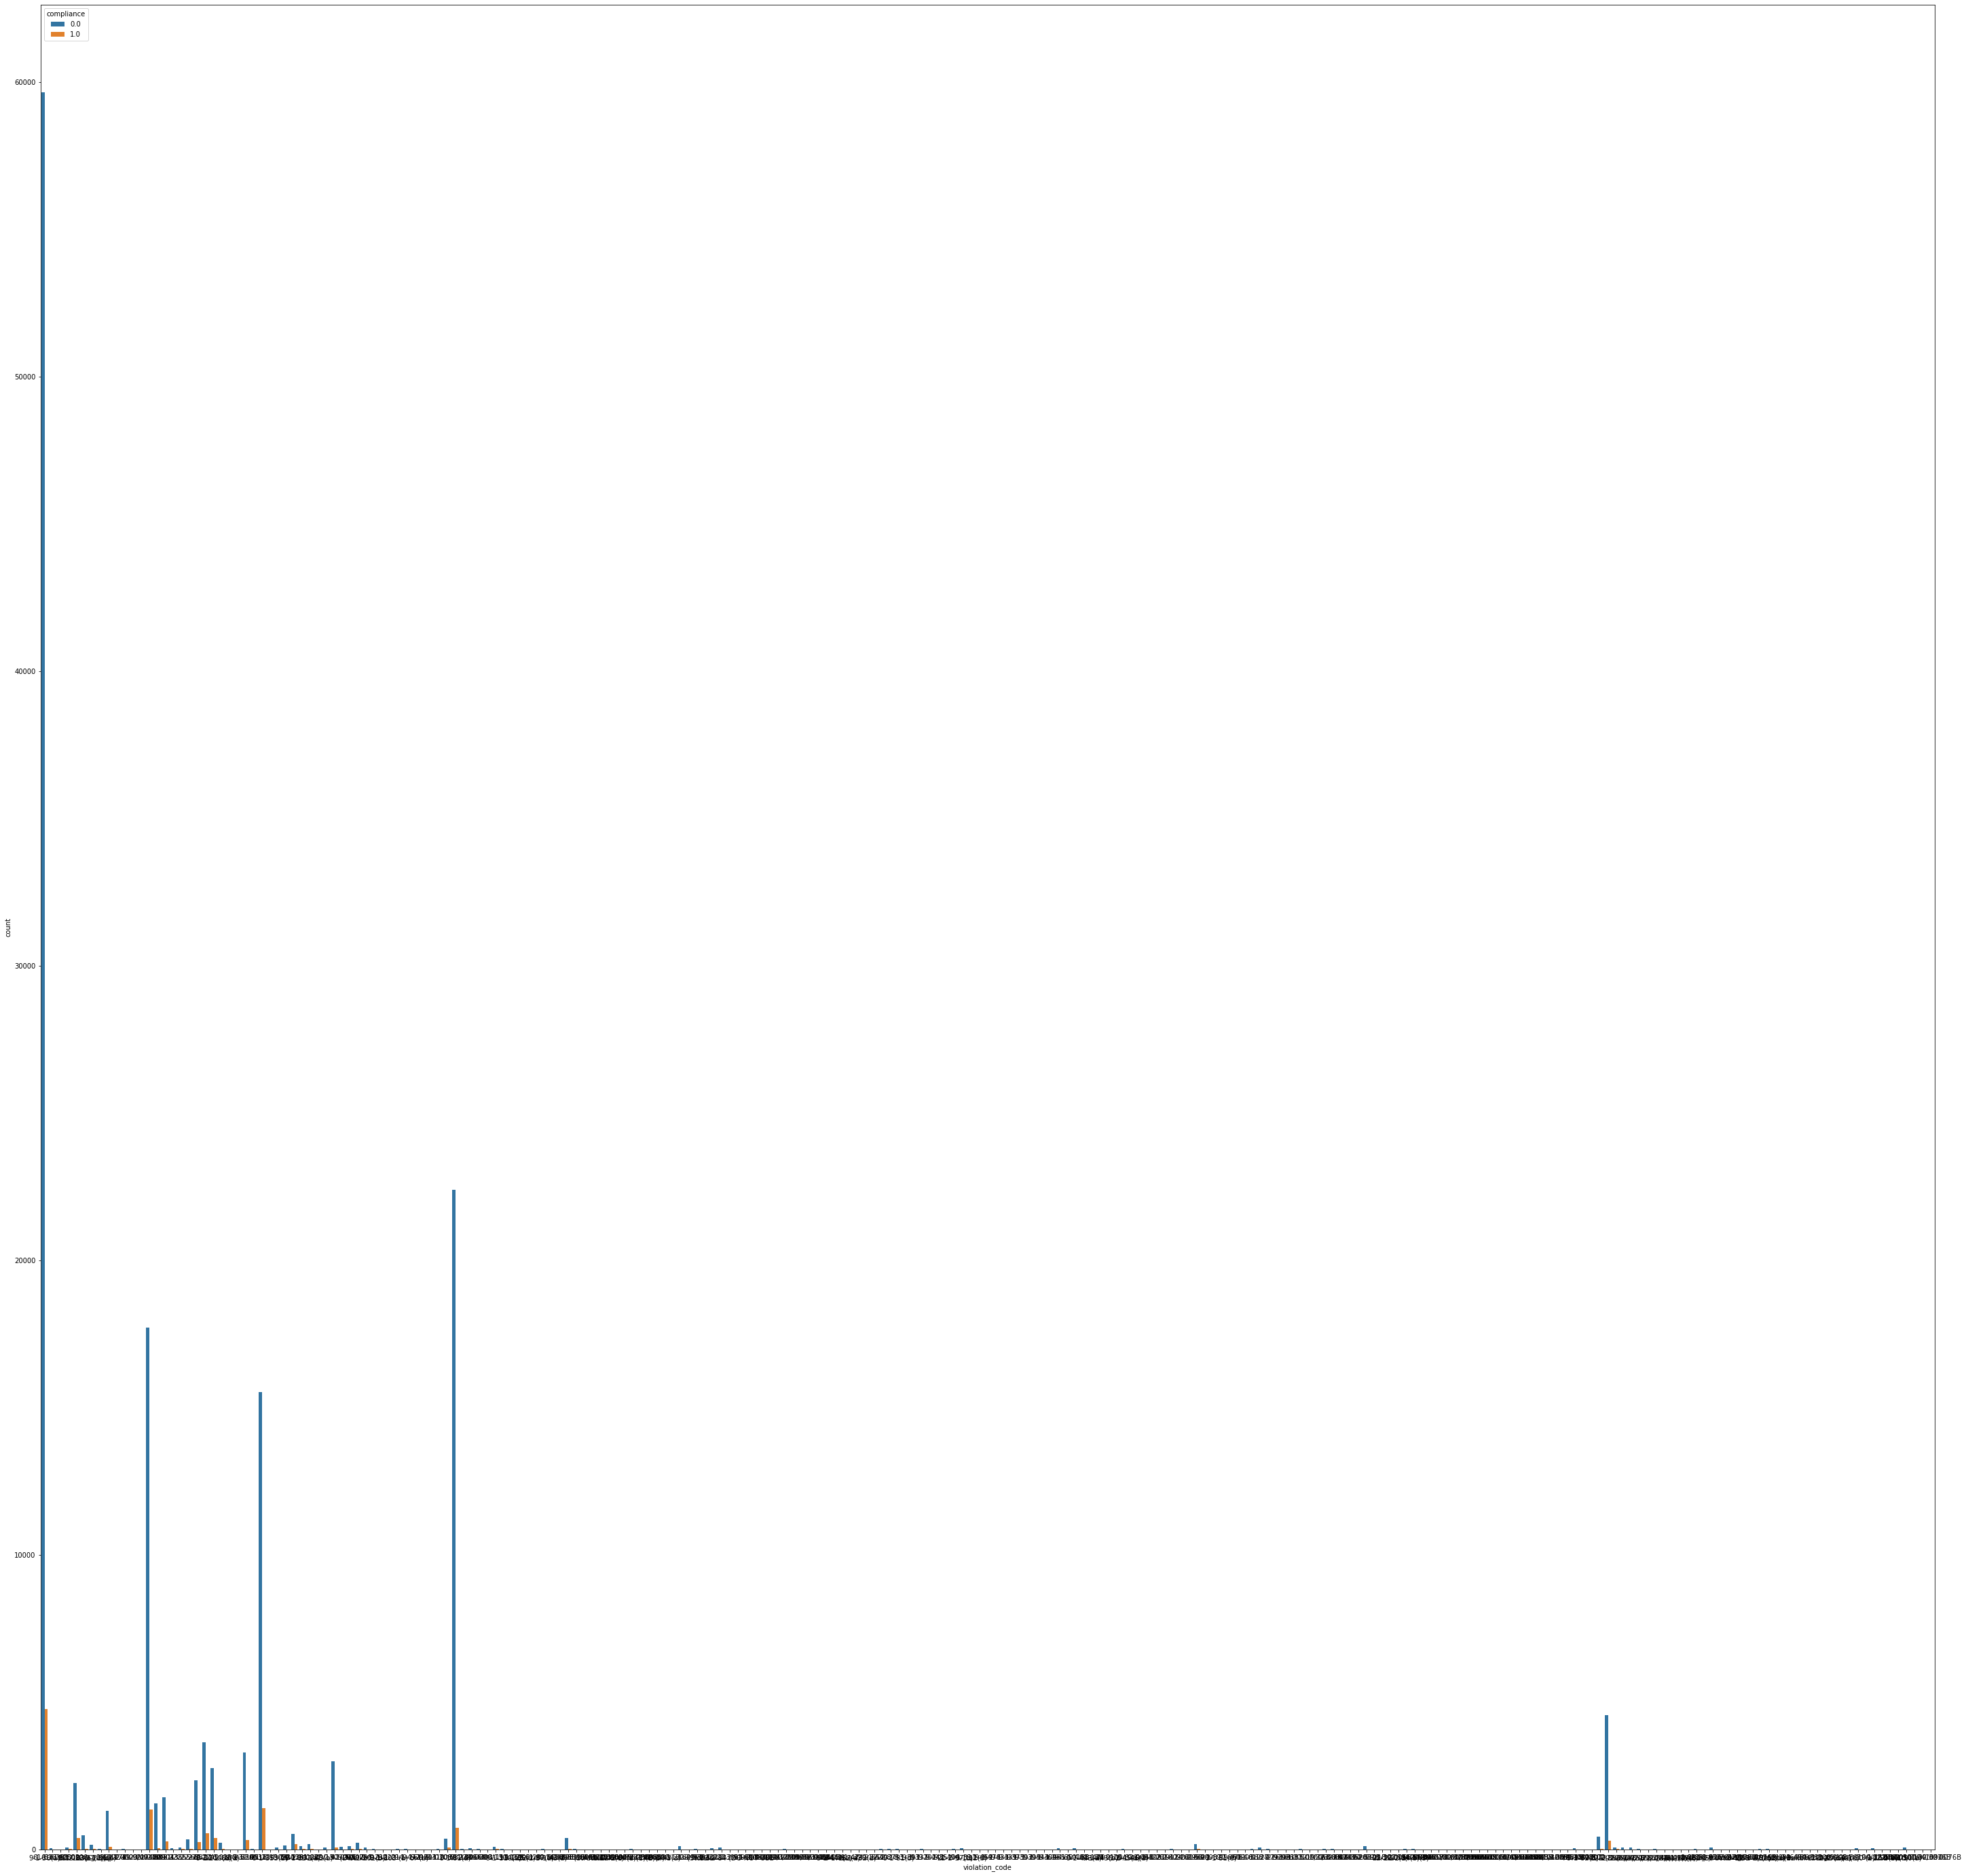

In [188]:
plt.figure(figsize=(50,50))
sns.countplot(data = df_train, x = 'violation_code', hue = 'compliance')

In [189]:
df = df_train[df_train['violation_code'].str.contains('9-1', case = False)]
lista = df.violation_code.unique()

In [190]:
lista.tolist()

['9-1-36(a)',
 '9-1-103(C)',
 '9-1-36(c)',
 '9-1-355',
 '9-1-110(a)',
 '9-1-105',
 '9-1-104',
 '9-1-353(2)',
 '9-1-101',
 '9-1-201(a)',
 '9-1-209',
 '9-1-43(a) - (Dwellin',
 '9-1-205',
 '9-1-107',
 '9-1-206',
 '9-1-201(b)',
 '9-1-210',
 '9-1-220',
 '9-1-214',
 '9-1-103 (a) or (b)',
 '9-1-477',
 '9-1-211',
 '9-1-204',
 '9-1-310',
 '9-1-208',
 '9-1-81(a)',
 '9-1-476',
 '9-1-303',
 '9-1-111',
 '9-1-110(b)',
 '9-1-221',
 '9-1-36(d)',
 '9-1-106',
 '9-1-108',
 '9-1-43(a) - (Structu',
 '9-1-45(c)',
 '9-1-503',
 '9-1-216',
 '9-1-43(a) - (Stories',
 '9-1-304',
 '9-1-102',
 '9-1-212',
 '9-1-207',
 '9-1-354',
 '9-1-306',
 '9-1-213',
 '9-1-464',
 '9-1-441',
 '9-1-441(a)',
 '9-1-462(a)',
 '9-1-474',
 '9-1-432(a)',
 '9-1-440',
 '9-1-81(b)',
 '9-1-301',
 '9-1-331',
 '9-1-202',
 '9-1-442',
 '9-1-351',
 '9-1-406',
 '9-1-311',
 '9-1-12(b)',
 '9-1-469',
 '9-1-478',
 '9-1-433',
 '9-1-439',
 '9-1-375',
 '9-1-307',
 '9-1-305',
 '9-1-444',
 '9-1-309',
 '9-1-465',
 '9-1-501',
 '9-1-443(a)',
 '9-1-479',
 '9-1-

In [191]:
def cambio_codigo(ciudad):
  df_train['violation_code'] = np.where(df_train['violation_code'] == ciudad, '9', df_train['violation_code'])

In [192]:
for word in lista:
  cambio_codigo(word)

In [193]:
df = df_train[df_train['violation_code'].str.contains('9', case = False)]
lista = df.violation_code.unique()
lista.tolist()

['9',
 '22-2-49',
 '61-90.0100',
 '19450901',
 '20130901',
 '19830901',
 '22-2-91',
 '22-2-94',
 '22-2-97(b)',
 '20180901',
 '22-2-96',
 '19840901',
 '19850901',
 '22-2-93',
 '61-5-19',
 '19420901',
 '22-2-49(a)',
 '22-2-49(c)',
 '22-2-92',
 '61-96.0100/32.0066',
 '22-2-19',
 '22-2-97',
 '22-2-49(d)',
 '22-2-96(a)',
 '22-2-49(b)',
 '20160901',
 '19410901']

In [194]:
df_train['violation_code'].unique()

array(['9', '61-63.0600', '61-63.0500', '61-63.0100', '22-2-83(a)(b)(c)',
       '22-2-21(b)', '22-2-17', '22-2-49', '22-2-23',
       '61-47.0000/47.0108', '61-90.0100', '22-2-88', '19450901',
       '22-2-43', '22-2-56', '22-2-83', '22-2-22', '22-2-45',
       '22-2-88(a)', '61-116.0100/32.0031', '22-2-83a', '22-2-16',
       '20130901', '22-2-61', '61-130.0000/130.0400', '22-2-41',
       '61-81.0100/32.0066', '22-2-44', '61-130.0000/130.0300', '22-2-20',
       '22-2-87(a)', '61-80.0100', '19830901', '61-82.0100/32.0066',
       '61-81.0100/45.0807', '61-83.0100/32.0066', '61-102.0100/32.0066',
       '61-101.0100/32.0066', '22-2-84(a)(1)(2)(4)', '22-2-85', '22-2-86',
       '61-130.0000/130.0500', '22-2-91', '22-2-38', '22-2-94',
       '22-2-84 (DO NOT USE ', '61-111.0100/32.0066',
       '61-84.0100/32.0066', '61-121.0100/32.0066', '61-120.0100/32.0066',
       '61-105.0100/32.066', '22-2-55', '22-2-87', '22-2-53',
       '22-2-97(b)', '61-4-32', '61-4-33', '22-2-18',
       '61

In [195]:
df = df_train[df_train['violation_code'].str.contains('22-', case = False)]
lista = df.violation_code.unique()
lista.tolist()

['22-2-83(a)(b)(c)',
 '22-2-21(b)',
 '22-2-17',
 '22-2-49',
 '22-2-23',
 '22-2-88',
 '22-2-43',
 '22-2-56',
 '22-2-83',
 '22-2-22',
 '22-2-45',
 '22-2-88(a)',
 '22-2-83a',
 '22-2-16',
 '22-2-61',
 '22-2-41',
 '22-2-44',
 '22-2-20',
 '22-2-87(a)',
 '22-2-84(a)(1)(2)(4)',
 '22-2-85',
 '22-2-86',
 '22-2-91',
 '22-2-38',
 '22-2-94',
 '22-2-84 (DO NOT USE ',
 '22-2-55',
 '22-2-87',
 '22-2-53',
 '22-2-97(b)',
 '22-2-18',
 '22-2-42',
 '22-2-96',
 '22-2-93',
 '22-3-2',
 '22-2-21(a)',
 '22-2-84(b)(3)',
 '22-2-25',
 '22-2-88(b)',
 '22-2-22(a)',
 '22-2-17(a)',
 '22-2-83(c)',
 '22-2-83(b)',
 '22-2-83(d)',
 '22-2-84(a)',
 '22-2-84(b)(1)',
 '22-2-49(a)',
 '22-2-49(c)',
 '22-2-92',
 '22-2-19',
 '22-2-97',
 '22-2-42(b)',
 '22-2-49(d)',
 '22-2-96(a)',
 '22-2-41(b)',
 '22-3-3',
 '22-2-49(b)']

In [196]:
def cambio_codigo(ciudad):
  df_train['violation_code'] = np.where(df_train['violation_code'] == ciudad, '22', df_train['violation_code'])

In [197]:
for word in lista:
  cambio_codigo(word)

In [198]:
df = df_train[df_train['violation_code'].str.contains('22', case = False)]
lista = df.violation_code.unique()
lista.tolist()

['22', '61-122.0100/32.0066']

In [199]:
df_train['violation_code'].unique()

array(['9', '61-63.0600', '61-63.0500', '61-63.0100', '22',
       '61-47.0000/47.0108', '61-90.0100', '19450901',
       '61-116.0100/32.0031', '20130901', '61-130.0000/130.0400',
       '61-81.0100/32.0066', '61-130.0000/130.0300', '61-80.0100',
       '19830901', '61-82.0100/32.0066', '61-81.0100/45.0807',
       '61-83.0100/32.0066', '61-102.0100/32.0066', '61-101.0100/32.0066',
       '61-130.0000/130.0500', '61-111.0100/32.0066',
       '61-84.0100/32.0066', '61-121.0100/32.0066', '61-120.0100/32.0066',
       '61-105.0100/32.066', '61-4-32', '61-4-33', '61-114.0100/32.0031',
       '20180901', '61-114.0100', '61-5-21', '19840901', '19850901',
       '61-4-38', '61-8-127', '61-8-27', '61-5-19', '61-81.0100/32.0031',
       '61-83.0100/32.0031', '61-8-47', '61-45.0000', '61-5-18',
       '61-122.0100/32.0066', '61-118.0100/32.0066', '19420901',
       '61-14-176', '61-86.0100/32.0076B', '61-86.0100/32.0066',
       '61-85.0100/32.0066', '61-82.0100/32.0031', '61-104.0100',
       

In [200]:
df = df_train[df_train['violation_code'].str.contains('61-', case = False)]
lista = df.violation_code.unique()
lista.tolist()

def cambio_codigo(ciudad):
  df_train['violation_code'] = np.where(df_train['violation_code'] == ciudad, '61', df_train['violation_code'])

for word in lista:
  cambio_codigo(word)

In [201]:
df_train['violation_code'].unique()

array(['9', '61', '22', '19450901', '20130901', '19830901', '20180901',
       '19840901', '19850901', '19420901', '20160901', '19410901'],
      dtype=object)

In [202]:
df = df_train[df_train['violation_code'].str.contains('19', case = False)]
lista = df.violation_code.unique()
lista.tolist()

def cambio_codigo(ciudad):
  df_train['violation_code'] = np.where(df_train['violation_code'] == ciudad, '19', df_train['violation_code'])

for word in lista:
  cambio_codigo(word)

In [203]:
df_train['violation_code'].unique()

array(['9', '61', '22', '19', '20130901', '20180901', '20160901'],
      dtype=object)

In [204]:
df = df_train[df_train['violation_code'].str.contains('20', case = False)]
lista = df.violation_code.unique()
lista.tolist()

def cambio_codigo(ciudad):
  df_train['violation_code'] = np.where(df_train['violation_code'] == ciudad, '20', df_train['violation_code'])

for word in lista:
  cambio_codigo(word)

In [205]:
df_train['violation_code'].unique()

array(['9', '61', '22', '19', '20'], dtype=object)

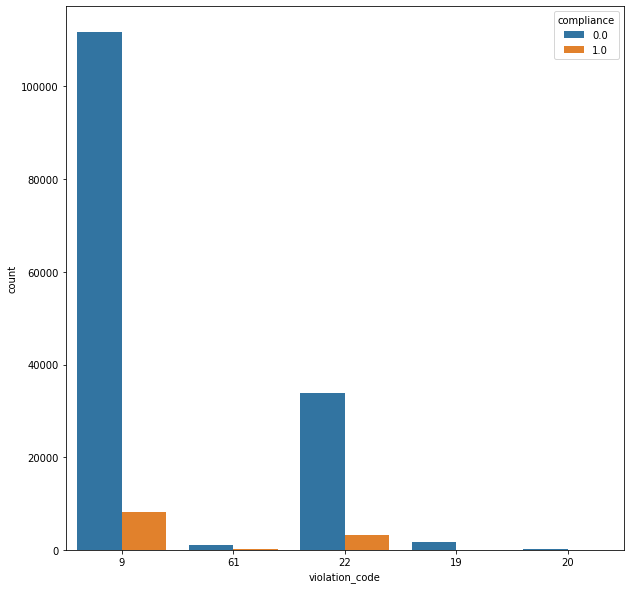

In [206]:
plt.figure(figsize=(10,10))
sns.countplot(data = df_train, x = 'violation_code', hue = 'compliance')

In [207]:
violation_code_table = pd.crosstab(df_train['violation_code'], df_train['compliance'])
violation_code_table

compliance,0.0,1.0
violation_code,,
19,1599,50
20,89,5
22,33833,3158
61,1058,152
9,111704,8232


In [208]:
violation_code_table.astype("float").div(violation_code_table.sum(axis = 1), axis = 0)

compliance,0.0,1.0
violation_code,,
19,0.969679,0.030321
20,0.946809,0.053191
22,0.914628,0.085372
61,0.874380,0.125620
9,0.931363,0.068637


Podemos observar mediante la gráfica y la tabla de frecuencias que los infractores que más pagan sus multas son los que tuvieron el delito con código *61* con un *12%* de pago, mientra qu elos que menos realizan el pago son las personas con el código *19* con un *3%* de pago. 

#### ¿El pago de la multa depende si se aplica o no descuento? 

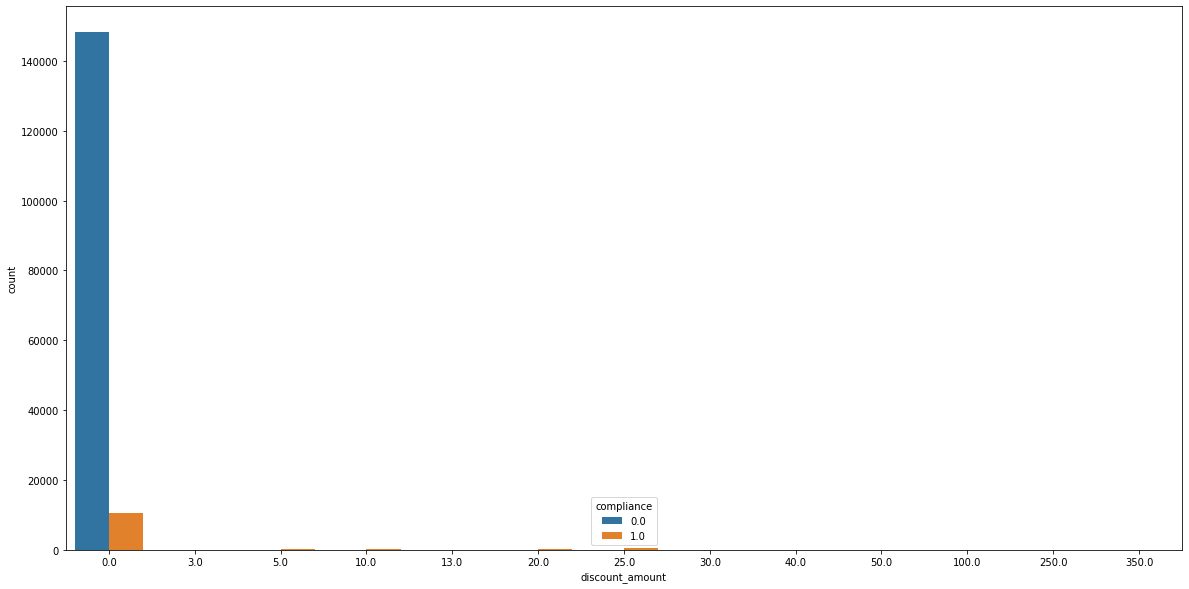

In [209]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_train, x = 'discount_amount', hue = 'compliance')

In [210]:
discount_table = pd.crosstab(df_train['discount_amount'], df_train['compliance'])
discount_table

compliance,0.0,1.0
discount_amount,,
0.0,148226,10474
3.0,0,19
5.0,8,159
10.0,14,141
13.0,0,1
20.0,13,122
25.0,18,587
30.0,0,17
40.0,0,1


In [211]:
discount_table.astype("float").div(discount_table.sum(axis = 1), axis = 0)

compliance,0.0,1.0
discount_amount,,
0.0,0.934001,0.065999
3.0,0.000000,1.000000
5.0,0.047904,0.952096
10.0,0.090323,0.909677
13.0,0.000000,1.000000
20.0,0.096296,0.903704
25.0,0.029752,0.970248
30.0,0.000000,1.000000
40.0,0.000000,1.000000


In [212]:
df_train[df_train['discount_amount'] > 0]

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
41,18653,"Buildings, Safety Engineering & Env Department","Gailes, Orbie J","Garden Court Apt.s, na",2900.0,JEFFERSON,NaN,29.0,E. Jefferson,Det,...,0.0,280.0,255.0,0.0,2005-02-22 00:00:00,PAID IN FULL,NaN,NaN,compliant by early payment,1.0
44,18655,"Buildings, Safety Engineering & Env Department","Gailes, Orbie J","Apt.s, Clairwood",100.0,CLAIRMOUNT,NaN,784.0,PO box,Bloomfield Hills,...,0.0,280.0,250.0,5.0,2005-02-09 00:00:00,PAID IN FULL,NaN,NaN,compliant by early payment,1.0
314,18915,"Buildings, Safety Engineering & Env Department","Gailes, Orbie J","Of America, First",12500.0,LIVERNOIS,NaN,125.0,Livernois,Det,...,0.0,280.0,250.0,5.0,2005-01-25 00:00:00,PAID IN FULL,NaN,NaN,compliant by early payment,1.0
2226,20851,"Buildings, Safety Engineering & Env Department","O'Neal, Claude","HARRIS, ERWIN",2527.0,CRANE,NaN,7631.0,W. 7 MILE RD.,DETROIT,...,0.0,330.0,260.0,40.0,2005-06-23 00:00:00,PAID IN FULL,NaN,NaN,compliant by on-time payment,1.0
2414,22450,"Buildings, Safety Engineering & Env Department","Otis, Joseph D","REYERS, MR.",4826.0,LIVERNOIS,NaN,4826.0,LIVERNOIS,DETROIT,...,0.0,280.0,280.0,-25.0,2005-05-11 00:00:00,PAID IN FULL,NaN,NaN,compliant by early payment,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248521,283611,Department of Public Works,"Forte, Laurie","SINAPURA INVESTMENTS SERIES 5 , .",19472.0,DWYER,NaN,475.0,DURANGO DR STE 111.58,LAS VEGAS,...,0.0,230.0,1130.0,-920.0,2012-02-16 00:00:00,PAID IN FULL,NaN,NaN,compliant by payment with no scheduled hearing,1.0
249221,283866,Department of Public Works,"Johnson, Lois","EDAD, MD A",11942.0,CONANT,NaN,11942.0,CONANT,DETROIT,...,0.0,230.0,250.0,-40.0,2012-01-13 00:00:00,PAID IN FULL,NaN,NaN,compliant by payment with no scheduled hearing,1.0
249608,284173,Department of Public Works,"Havard, Jacqueline","INVESTMENTS LLC, T R B",17800.0,FILER,NaN,178.0,FILER,DETROIT,...,0.0,230.0,250.0,-40.0,2012-04-16 00:00:00,PAID IN FULL,NaN,NaN,compliant by payment with no scheduled hearing,1.0
249662,285014,Department of Public Works,"McCants, Angela","OKONKWO, BENNETH C",629.0,LAKEWOOD,NaN,2246.0,W. PHILADELPHIA,DETROIT,...,0.0,230.0,250.0,-40.0,2012-02-28 00:00:00,PAID IN FULL,NaN,NaN,compliant by payment with no scheduled hearing,1.0


### Correlación variables numéricas 

In [213]:
# Correlación 

df_train.corr()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
ticket_id,1.000000,-0.002827,NaN,-0.003678,-0.002520,-0.038099,-0.038099,-0.005715,-0.019900,NaN,-0.012859,-0.048120,0.003718,-0.026264
violation_street_number,-0.002827,1.000000,NaN,0.013532,0.001184,0.002639,0.002639,0.003138,0.000531,NaN,0.003012,-0.000514,0.003301,-0.002526
violation_zip_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mailing_address_str_number,-0.003678,0.013532,NaN,1.000000,-0.009989,-0.000592,-0.000592,-0.007281,-0.001119,NaN,-0.007744,-0.013847,-0.002966,-0.010010
fine_amount,-0.002520,0.001184,NaN,-0.009989,1.000000,-0.032694,-0.032694,0.712581,0.029248,NaN,0.712200,0.185201,0.677729,-0.049134
admin_fee,-0.038099,0.002639,NaN,-0.000592,-0.032694,1.000000,1.000000,0.286289,0.027442,NaN,0.322319,0.139338,0.275884,NaN
state_fee,-0.038099,0.002639,NaN,-0.000592,-0.032694,1.000000,1.000000,0.286289,0.027442,NaN,0.322319,0.139338,0.275884,NaN
late_fee,-0.005715,0.003138,NaN,-0.007281,0.712581,0.286289,0.286289,1.000000,-0.013891,NaN,0.989371,0.198416,0.948404,-0.085055
discount_amount,-0.019900,0.000531,NaN,-0.001119,0.029248,0.027442,0.027442,-0.013891,1.000000,NaN,0.040895,0.148797,-0.018124,0.156073
clean_up_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
corr = df_train.corr() 

corr.style.background_gradient(cmap = 'GnBu_r')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
ticket_id,1.000000,-0.002827,nan,-0.003678,-0.002520,-0.038099,-0.038099,-0.005715,-0.019900,nan,-0.012859,-0.048120,0.003718,-0.026264
violation_street_number,-0.002827,1.000000,nan,0.013532,0.001184,0.002639,0.002639,0.003138,0.000531,nan,0.003012,-0.000514,0.003301,-0.002526
violation_zip_code,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mailing_address_str_number,-0.003678,0.013532,nan,1.000000,-0.009989,-0.000592,-0.000592,-0.007281,-0.001119,nan,-0.007744,-0.013847,-0.002966,-0.010010
fine_amount,-0.002520,0.001184,nan,-0.009989,1.000000,-0.032694,-0.032694,0.712581,0.029248,nan,0.712200,0.185201,0.677729,-0.049134
admin_fee,-0.038099,0.002639,nan,-0.000592,-0.032694,1.000000,1.000000,0.286289,0.027442,nan,0.322319,0.139338,0.275884,nan
state_fee,-0.038099,0.002639,nan,-0.000592,-0.032694,1.000000,1.000000,0.286289,0.027442,nan,0.322319,0.139338,0.275884,nan
late_fee,-0.005715,0.003138,nan,-0.007281,0.712581,0.286289,0.286289,1.000000,-0.013891,nan,0.989371,0.198416,0.948404,-0.085055
discount_amount,-0.019900,0.000531,nan,-0.001119,0.029248,0.027442,0.027442,-0.013891,1.000000,nan,0.040895,0.148797,-0.018124,0.156073
clean_up_cost,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [215]:
corr.style.background_gradient(cmap = 'GnBu_r').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
ticket_id,1.00,-0.00,nan,-0.00,-0.00,-0.04,-0.04,-0.01,-0.02,nan,-0.01,-0.05,0.00,-0.03
violation_street_number,-0.00,1.00,nan,0.01,0.00,0.00,0.00,0.00,0.00,nan,0.00,-0.00,0.00,-0.00
violation_zip_code,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mailing_address_str_number,-0.00,0.01,nan,1.00,-0.01,-0.00,-0.00,-0.01,-0.00,nan,-0.01,-0.01,-0.00,-0.01
fine_amount,-0.00,0.00,nan,-0.01,1.00,-0.03,-0.03,0.71,0.03,nan,0.71,0.19,0.68,-0.05
admin_fee,-0.04,0.00,nan,-0.00,-0.03,1.00,1.00,0.29,0.03,nan,0.32,0.14,0.28,nan
state_fee,-0.04,0.00,nan,-0.00,-0.03,1.00,1.00,0.29,0.03,nan,0.32,0.14,0.28,nan
late_fee,-0.01,0.00,nan,-0.01,0.71,0.29,0.29,1.00,-0.01,nan,0.99,0.20,0.95,-0.09
discount_amount,-0.02,0.00,nan,-0.00,0.03,0.03,0.03,-0.01,1.00,nan,0.04,0.15,-0.02,0.16
clean_up_cost,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Figure size 1440x1440 with 0 Axes>

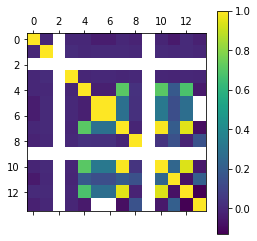

In [216]:
plt.figure(figsize = (20,20))
plt.matshow(df_train.corr())
plt.colorbar()

### Continuación del análisis de variables 

In [217]:
df = df_train.groupby(by = 'state').mean()

In [218]:
df.loc[:,['fine_amount', 'compliance']].sort_values(by = 'compliance')

,fine_amount,compliance
state,,
ND,525.000000,0.000000
WV,125.000000,0.000000
MT,366.964286,0.000000
BC,197.058824,0.000000
BL,50.000000,0.000000
QC,390.000000,0.000000
PR,170.000000,0.000000
VI,625.000000,0.000000
NM,535.714286,0.000000


In [219]:
df_train[(df_train['state'] == 'MT') & (df_train['compliance'] == 1)]

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance


Con esto podemos observar que el el estado que más paga sus multas es Quincy Illinois, mientars que uno de los que menos paga las multas es North Dakota. 

In [220]:
df_train['disposition'].value_counts()

Responsible by Default                138340
Not responsible by Dismissal           48695
Not responsible by City Dismissal      34401
Responsible by Admission               13701
Responsible by Determination            7644
Not responsible by Determination        6639
PENDING JUDGMENT                         387
SET-ASIDE (PENDING JUDGMENT)             304
Responsible (Fine Waived) by Deter       195
Name: disposition, dtype: int64

In [221]:
df_train['discount_amount'].value_counts()

0.0      249126
25.0        605
5.0         167
10.0        155
20.0        135
50.0         43
3.0          19
30.0         17
100.0        16
350.0        15
250.0         6
13.0          1
40.0          1
Name: discount_amount, dtype: int64

In [222]:
df_train['late_fee'].value_counts()

0.0       105884
25.0       79621
5.0        17655
10.0       12516
20.0       11354
50.0        6545
100.0       4803
350.0       3785
30.0        3680
250.0       1506
2.5         1223
12.5         723
150.0        251
75.0         217
1000.0       195
35.0         126
500.0         85
120.0         40
40.0          36
200.0         14
700.0         13
60.0          10
300.0          4
22.0           3
16.0           2
175.0          2
125.0          2
9.5            2
17.0           1
67.7           1
65.5           1
800.0          1
45.0           1
269.5          1
15.0           1
97.0           1
0.1            1
Name: late_fee, dtype: int64

Ahora, podemos observar que la mayor parte de las personas con multa son responsables por default y que más del *70%* de las veces no se otorga ningún tipo de descuento. 

## Transformación de variables

* Agrupar códigos de violation
* Agrupar por disposition 
* Transformar columnas de multas 
* Transformar la columna de descuento 

In [223]:
df_train['fine_amount'] = np.where(df_train['fine_amount'] > 0, 1, 0)
df_train['admin_fee'] = np.where(df_train['admin_fee'] > 0, 1, 0)
df_train['state_fee'] = np.where(df_train['state_fee'] > 0, 1, 0)
df_train['late_fee'] = np.where(df_train['late_fee'] > 0, 1, 0)

In [224]:
df_train['disposition'] = np.where(df_train['disposition'] == 'Not responsible by Dismissal', 'Not responsible', df_train['disposition'])
df_train['disposition'] = np.where(df_train['disposition'] == 'Not responsible by City Dismissal', 'Not responsible', df_train['disposition'])
df_train['disposition'] = np.where(df_train['disposition'] == 'Not responsible by Determination', 'Not responsible', df_train['disposition'])
df_train['disposition'] = np.where(df_train['disposition'] == 'SET-ASIDE (PENDING JUDGMENT)', 'Pending (unknown)', df_train['disposition'])
df_train['disposition'] = np.where(df_train['disposition'] == 'PENDING JUDGMENT', 'Pending (unknown)', df_train['disposition'])


In [225]:
df_train['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Not responsible', 'Pending (unknown)', 'Responsible by Admission',
       'Responsible (Fine Waived) by Deter'], dtype=object)

In [226]:
df_train['discount_amount'] = np.where(df_train['discount_amount'] > 0, 1, 0) #Si tiene descuento (1)/ No tiene descuento (0)

In [227]:
df_train['discount_amount'].unique()

array([0, 1])

In [228]:
df_train.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,DETROIT,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [229]:
df_train['grafitti_status'].isna().sum()

250305

In [230]:
df_train['grafitti_status'].shape

(250306,)

In [231]:
df_train['collection_status'].isna().sum()

213409

In [232]:
df_train['collection_status'].shape

(250306,)

In [233]:
df_train.drop(['violation_zip_code'], axis = 1)
df_train.drop(['grafitti_status'], axis = 1)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,DETROIT,...,0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,not responsible by disposition,NaN


## Variables

* Agencia
* Disposition
* Deudas = Fine amount + Admin + State + Late
* Descuento 
* Judgment amount
* State
* Código de violación 

In [234]:
features = ['ticket_id', 'agency_name', 'state',
            'fine_amount', 'admin_fee', 'state_fee',
            'late_fee', 'discount_amount', 'disposition',
            'judgment_amount', 'violation_code']
objetive = ['compliance']

In [235]:
df_train = df_train.dropna(subset=['compliance'])

In [236]:
X = df_train[features]
X.set_index('ticket_id', inplace=True)
X

,agency_name,state,fine_amount,admin_fee,state_fee,late_fee,discount_amount,disposition,judgment_amount,violation_code
ticket_id,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,1,1,1,1,0,Responsible by Default,305.0,9
27586,"Buildings, Safety Engineering & Env Department",MI,1,1,1,1,0,Responsible by Determination,855.0,61
22046,"Buildings, Safety Engineering & Env Department",CA,1,1,1,1,0,Responsible by Default,305.0,9
18738,"Buildings, Safety Engineering & Env Department",MI,1,1,1,1,0,Responsible by Default,855.0,61
18735,"Buildings, Safety Engineering & Env Department",MI,1,1,1,1,0,Responsible by Default,140.0,61
...,...,...,...,...,...,...,...,...,...,...
285106,Department of Public Works,MI,1,1,1,1,0,Responsible by Default,250.0,22
284650,Department of Public Works,MI,1,1,1,1,0,Responsible by Default,1130.0,22
285125,Department of Public Works,MI,1,1,1,1,0,Responsible by Default,580.0,22


In [237]:
y = df_train[objetive]
y

,compliance
0,0.0
1,1.0
5,0.0
6,0.0
7,0.0
...,...
250278,0.0
250287,0.0
250288,0.0
250290,1.0


In [238]:
X['multas'] = X['admin_fee'] +  X['late_fee'] + X['fine_amount'] + X['state_fee']
X.drop(['admin_fee', 'late_fee', 'fine_amount', 'state_fee'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [239]:
X.agency_name.value_counts()

Buildings, Safety Engineering & Env Department    95863
Department of Public Works                        52445
Health Department                                  7107
Detroit Police Department                          4464
Neighborhood City Halls                               1
Name: agency_name, dtype: int64

### Codificación de variables para *X_train1*

In [240]:
# Implementando el binary encoding a la variable state 
! pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [241]:
from pandas.core.internals import concat
encoder = ce.BinaryEncoder(cols = ['state'])
dfbin = encoder.fit_transform(X['state'])
X = pd.concat([X, dfbin], axis = 1)

In [242]:
X.head()

,agency_name,state,discount_amount,disposition,judgment_amount,violation_code,multas,state_0,state_1,state_2,state_3,state_4,state_5
ticket_id,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,0,Responsible by Default,305.0,9,4,0,0,0,0,0,1
27586,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Determination,855.0,61,4,0,0,0,0,1,0
22046,"Buildings, Safety Engineering & Env Department",CA,0,Responsible by Default,305.0,9,4,0,0,0,0,1,1
18738,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,855.0,61,4,0,0,0,0,1,0
18735,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,140.0,61,4,0,0,0,0,1,0


In [243]:
# Implememntando Label Encoding a agency_name 

from sklearn.preprocessing import LabelEncoder
X['agency_name_label_encoded'] = LabelEncoder().fit_transform(X.agency_name)
X

,agency_name,state,discount_amount,disposition,judgment_amount,violation_code,multas,state_0,state_1,state_2,state_3,state_4,state_5,agency_name_label_encoded
ticket_id,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,0,Responsible by Default,305.0,9,4,0,0,0,0,0,1,0
27586,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Determination,855.0,61,4,0,0,0,0,1,0,0
22046,"Buildings, Safety Engineering & Env Department",CA,0,Responsible by Default,305.0,9,4,0,0,0,0,1,1,0
18738,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,855.0,61,4,0,0,0,0,1,0,0
18735,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,140.0,61,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285106,Department of Public Works,MI,0,Responsible by Default,250.0,22,4,0,0,0,0,1,0,1
284650,Department of Public Works,MI,0,Responsible by Default,1130.0,22,4,0,0,0,0,1,0,1
285125,Department of Public Works,MI,0,Responsible by Default,580.0,22,4,0,0,0,0,1,0,1


In [244]:
#Implememntando Label Encoding a disposition

from sklearn.preprocessing import LabelEncoder
X['disposition_label_encoded'] = LabelEncoder().fit_transform(X.disposition)
X

,agency_name,state,discount_amount,disposition,judgment_amount,violation_code,multas,state_0,state_1,state_2,state_3,state_4,state_5,agency_name_label_encoded,disposition_label_encoded
ticket_id,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,0,Responsible by Default,305.0,9,4,0,0,0,0,0,1,0,2
27586,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Determination,855.0,61,4,0,0,0,0,1,0,0,3
22046,"Buildings, Safety Engineering & Env Department",CA,0,Responsible by Default,305.0,9,4,0,0,0,0,1,1,0,2
18738,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,855.0,61,4,0,0,0,0,1,0,0,2
18735,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,140.0,61,4,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285106,Department of Public Works,MI,0,Responsible by Default,250.0,22,4,0,0,0,0,1,0,1,2
284650,Department of Public Works,MI,0,Responsible by Default,1130.0,22,4,0,0,0,0,1,0,1,2
285125,Department of Public Works,MI,0,Responsible by Default,580.0,22,4,0,0,0,0,1,0,1,2


In [245]:
# Implementando el binary encoding a la variable violation_code 
encoder = ce.BinaryEncoder(cols = ['violation_code'])
dfbin = encoder.fit_transform(X['violation_code'])
X = pd.concat([X, dfbin], axis = 1)

In [246]:
X_train1 = X.drop(['agency_name', 'state', 'disposition', 'violation_code'], axis = 1)
X_train1.head()

,discount_amount,judgment_amount,multas,state_0,state_1,state_2,state_3,state_4,state_5,agency_name_label_encoded,disposition_label_encoded,violation_code_0,violation_code_1,violation_code_2
ticket_id,,,,,,,,,,,,,,
22056,0,305.0,4,0,0,0,0,0,1,0,2,0,0,1
27586,0,855.0,4,0,0,0,0,1,0,0,3,0,1,0
22046,0,305.0,4,0,0,0,0,1,1,0,2,0,0,1
18738,0,855.0,4,0,0,0,0,1,0,0,2,0,1,0
18735,0,140.0,4,0,0,0,0,1,0,0,2,0,1,0


### Codificación de variables para X_train2

In [247]:
# Implementación de frequency Encoding a disposición 

fe = X.groupby('disposition').size()/len(X)
X.loc[:, 'disposition_freq_encoding'] = X['disposition'].map(fe)
X

,agency_name,state,discount_amount,disposition,judgment_amount,violation_code,multas,state_0,state_1,state_2,state_3,state_4,state_5,agency_name_label_encoded,disposition_label_encoded,violation_code_0,violation_code_1,violation_code_2,disposition_freq_encoding
ticket_id,,,,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,0,Responsible by Default,305.0,9,4,0,0,0,0,0,1,0,2,0,0,1,0.865274
27586,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Determination,855.0,61,4,0,0,0,0,1,0,0,3,0,1,0,0.047811
22046,"Buildings, Safety Engineering & Env Department",CA,0,Responsible by Default,305.0,9,4,0,0,0,0,1,1,0,2,0,0,1,0.865274
18738,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,855.0,61,4,0,0,0,0,1,0,0,2,0,1,0,0.865274
18735,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,140.0,61,4,0,0,0,0,1,0,0,2,0,1,0,0.865274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285106,Department of Public Works,MI,0,Responsible by Default,250.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274
284650,Department of Public Works,MI,0,Responsible by Default,1130.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274
285125,Department of Public Works,MI,0,Responsible by Default,580.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274


In [248]:
# Implementación de ordinal Encoding a agency_name

Agency_dict = {'Buildings, Safety Engineering & Env Department' : 5, 
              'Health Department' : 4, 
              'Department of Public Works' : 3,
              'Detroit Police Department' : 2, 
              'Neighborhood City Halls' : 1 }

X['agency_name_ordinal'] = X.agency_name.map(Agency_dict)
X

,agency_name,state,discount_amount,disposition,judgment_amount,violation_code,multas,state_0,state_1,state_2,state_3,state_4,state_5,agency_name_label_encoded,disposition_label_encoded,violation_code_0,violation_code_1,violation_code_2,disposition_freq_encoding,agency_name_ordinal
ticket_id,,,,,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,0,Responsible by Default,305.0,9,4,0,0,0,0,0,1,0,2,0,0,1,0.865274,5
27586,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Determination,855.0,61,4,0,0,0,0,1,0,0,3,0,1,0,0.047811,5
22046,"Buildings, Safety Engineering & Env Department",CA,0,Responsible by Default,305.0,9,4,0,0,0,0,1,1,0,2,0,0,1,0.865274,5
18738,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,855.0,61,4,0,0,0,0,1,0,0,2,0,1,0,0.865274,5
18735,"Buildings, Safety Engineering & Env Department",MI,0,Responsible by Default,140.0,61,4,0,0,0,0,1,0,0,2,0,1,0,0.865274,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285106,Department of Public Works,MI,0,Responsible by Default,250.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274,3
284650,Department of Public Works,MI,0,Responsible by Default,1130.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274,3
285125,Department of Public Works,MI,0,Responsible by Default,580.0,22,4,0,0,0,0,1,0,1,2,0,1,1,0.865274,3


In [263]:
X_train2 = X.drop(['agency_name_label_encoded', 'disposition_label_encoded', 'agency_name', 'state', 'disposition', 'violation_code'], axis = 1)
X_train2.head()

,discount_amount,judgment_amount,multas,state_0,state_1,state_2,state_3,state_4,state_5,violation_code_0,violation_code_1,violation_code_2,disposition_freq_encoding,agency_name_ordinal
ticket_id,,,,,,,,,,,,,,
22056,0,305.0,4,0,0,0,0,0,1,0,0,1,0.865274,5
27586,0,855.0,4,0,0,0,0,1,0,0,1,0,0.047811,5
22046,0,305.0,4,0,0,0,0,1,1,0,0,1,0.865274,5
18738,0,855.0,4,0,0,0,0,1,0,0,1,0,0.865274,5
18735,0,140.0,4,0,0,0,0,1,0,0,1,0,0.865274,5


## Elección de modelo 

Teniendo las codificiaciones hechas, se hará ahora la elección y entrenamiento de modelos para encontrar el mejor, se optará por un modelo de SVM y un árbol de decisión, cada uno se entrenará tanto con el conjunto de entrenamiento *X_train1* y *X_train2* para saber qué combinación de codificaciones es la mejor.


### SVM 

#### Dividir dataset 

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_train1, y, test_size = 0.20,
                                                    random_state=0)

#### Ejecutando el modelo con *X_train1*

In [251]:
# Creamos el modelo
svc = LinearSVC()
svc.probability = True
# Ajustamos el modelo a los datos de entrenamiento 
svc.fit(X_train, y_train)

# Realizamos la predicción
ypred = svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Evaluado modelo

In [252]:
# Score en datos de entrenamiento 
svc.score(X_train, y_train)

0.9440205153865399

In [258]:
# Score en datos de test 
acc_svc_1 = svc.score(X_test, y_test)
# recall_svc_1 = recall_score(X_test, y_test)
#tp / (tp + fn)
recall_svc_1 = 566 / (566 + 1781)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


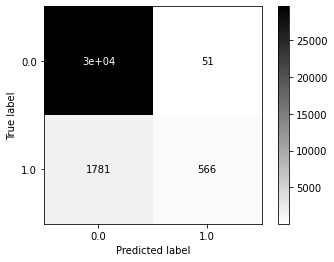

In [257]:
plot_confusion_matrix(svc, X_test, y_test, cmap='binary')
plt.show()

In [259]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     29629
         1.0       0.92      0.24      0.38      2347

    accuracy                           0.94     31976
   macro avg       0.93      0.62      0.68     31976
weighted avg       0.94      0.94      0.93     31976



In [260]:
# Curva de validación 

range_k = [x for x in range(1,10,3)]

train_score, test_score = validation_curve(svc,
                X_train1,
                y,
                param_name = 'C',
                param_range = range_k,
                cv = 3,
                scoring='recall')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1

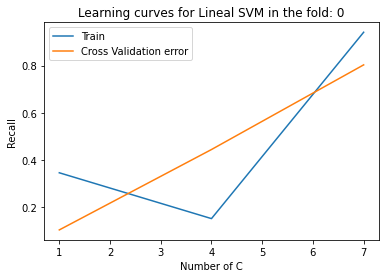

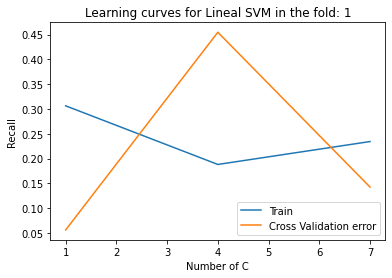

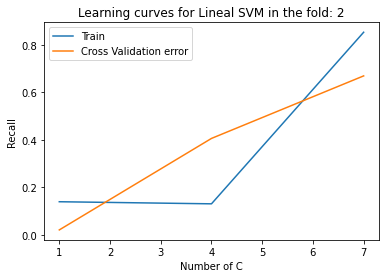

In [261]:
for i in range(len(train_score)):
  plt.plot(range_k,
          train_score[i],
          label='Train')
  plt.plot(range_k,
          test_score[i],
          label='Cross Validation error')
  plt.title('Learning curves for Lineal SVM in the fold: ' + str(i))
  plt.xlabel('Number of C')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

La métrica que observamos es la de *recall* porque nos interesa encontrar la clase positiva. 

#### Ejecutando el modelo con *X_train2*

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_train2, y, test_size = 0.20,
                                                    random_state=0)

In [265]:
# Creamos el modelo
svc = LinearSVC()

# Ajustamos el modelo a los datos de entrenamiento 
svc.fit(X_train, y_train)

# Realizamos la predicción
ypred = svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Evaluando modelo 

In [266]:
# Score en datos de entrenamiento 
svc.score(X_train, y_train)

0.9362803352514386

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


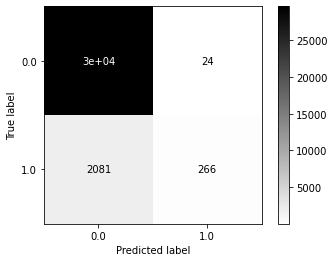

In [267]:
plot_confusion_matrix(svc, X_test, y_test, cmap='binary')
plt.show()

In [271]:
# Score en datos de entrenamiento 
acc_svc_2 = svc.score(X_test, y_test)
#recall_svc_2 = svc.recall_score(X_test, y_test)
#tp / (tp + fn)
recall_svc_2 = 266 / (266 + 2081)
recall_svc_2

0.11333617383894333

In [270]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     29629
         1.0       0.92      0.11      0.20      2347

    accuracy                           0.93     31976
   macro avg       0.93      0.56      0.58     31976
weighted avg       0.93      0.93      0.91     31976



In [273]:
# Curva de validación 

range_k = [x for x in range(1,10,3)]

train_score, test_score = validation_curve(svc,
                X_train2,
                y,
                param_name = 'C',
                param_range = range_k,
                scoring = 'recall',
                cv = 3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1

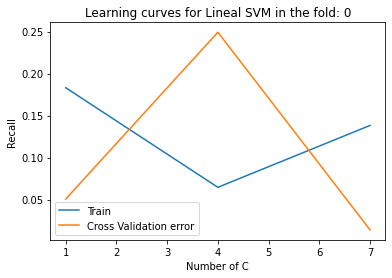

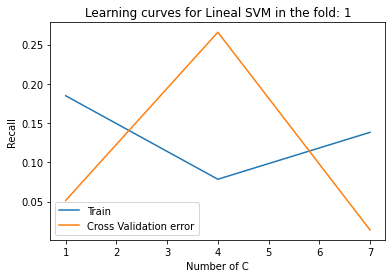

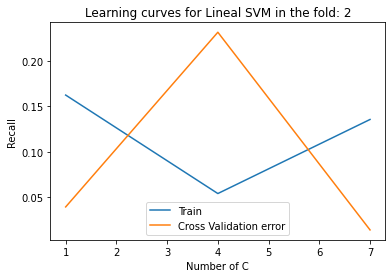

In [274]:
for i in range(len(train_score)):
  plt.plot(range_k,
          train_score[i],
          label='Train')
  plt.plot(range_k,
          test_score[i],
          label='Cross Validation error')
  plt.title('Learning curves for Lineal SVM in the fold: ' + str(i))
  plt.xlabel('Number of C')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

## Elección de modelo 

### Árbol de decisión 

#### Dividir dataset con *X_train1*

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X_train1, y, test_size = 0.20,
                                                    random_state=0)

#### Ejecutando modelo

In [276]:
# Creamos el modelo 
tree = tree.DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 5)
# Ajustamos el modelo
tree.fit(X_train, y_train)

ypred = tree.predict(X_test)

#### Evaluando modelo

In [277]:
tree.score(X_train, y_train )

0.9442394295721791

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


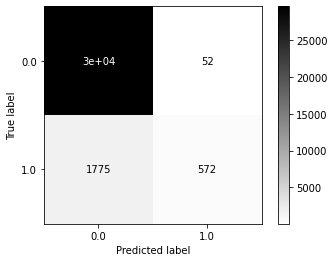

In [279]:
plot_confusion_matrix(tree, X_test, y_test, cmap='binary')
plt.show()

In [280]:
from sklearn.metrics import recall_score
acc_tree1 = tree.score(X_test, y_test)
#recall_tree1 = recall_score(X_test, y_test)
#tp / (tp + fn)
recall_tree_1 = 572 / (572 + 1775)
acc_tree1, recall_tree_1

(0.9428633975481612, 0.24371538133787815)

[Text(0.5043859649122807, 0.9166666666666666, 'X[2] <= 3.5\nentropy = 0.375\nsamples = 127904\nvalue = [118654, 9250]'),
 Text(0.2324561403508772, 0.75, 'X[10] <= 1.5\nentropy = 0.944\nsamples = 12376\nvalue = [7897, 4479]'),
 Text(0.09649122807017543, 0.5833333333333334, 'X[0] <= 0.5\nentropy = 0.862\nsamples = 10778\nvalue = [7705, 3073]'),
 Text(0.03508771929824561, 0.4166666666666667, 'X[2] <= 2.5\nentropy = 0.779\nsamples = 9956\nvalue = [7662, 2294]'),
 Text(0.017543859649122806, 0.25, 'entropy = 0.0\nsamples = 166\nvalue = [0, 166]'),
 Text(0.05263157894736842, 0.25, 'X[9] <= 0.5\nentropy = 0.755\nsamples = 9790\nvalue = [7662, 2128]'),
 Text(0.03508771929824561, 0.08333333333333333, 'entropy = 0.822\nsamples = 5060\nvalue = [3759, 1301]'),
 Text(0.07017543859649122, 0.08333333333333333, 'entropy = 0.669\nsamples = 4730\nvalue = [3903, 827]'),
 Text(0.15789473684210525, 0.4166666666666667, 'X[1] <= 255.0\nentropy = 0.296\nsamples = 822\nvalue = [43, 779]'),
 Text(0.1228070175438

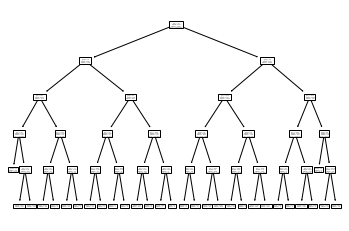

In [281]:
from sklearn.tree import plot_tree

plot_tree(tree)

In [282]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     29629
         1.0       0.92      0.24      0.39      2347

    accuracy                           0.94     31976
   macro avg       0.93      0.62      0.68     31976
weighted avg       0.94      0.94      0.93     31976



#### Dividir dataset con X_train2

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_train2, y, test_size = 0.20,
                                                    random_state=0)

In [286]:
# Creamos el modelo 
tree2 = tree.DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 5)
# Ajustamos el modelo
tree2.fit(X_train, y_train)

ypred = tree2.predict(X_test)

#### Evaluando modelo 

In [287]:
tree2.score(X_train, y_train)

0.9442550662997248

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     29629
         1.0       0.92      0.24      0.39      2347

    accuracy                           0.94     31976
   macro avg       0.93      0.62      0.68     31976
weighted avg       0.94      0.94      0.93     31976



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


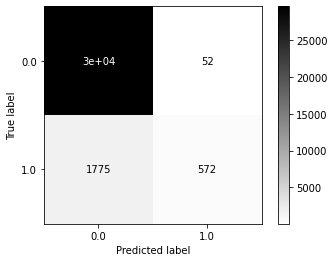

In [289]:
print(classification_report(y_test, ypred))

plot_confusion_matrix(tree2, X_test, y_test, cmap='binary')
plt.show()

In [292]:
acc_tree2 = tree2.score(X_test, y_test)
#recall_tree2 = tree.score_recall(X_test, y_test)
recall_tree_2 = 572 / (572 + 1775)
acc_tree2, recall_tree_2

(0.9428633975481612, 0.24371538133787815)

[Text(0.4543269230769231, 0.9166666666666666, 'X[2] <= 3.5\nentropy = 0.375\nsamples = 127904\nvalue = [118654, 9250]'),
 Text(0.18269230769230768, 0.75, 'X[12] <= 0.067\nentropy = 0.944\nsamples = 12376\nvalue = [7897, 4479]'),
 Text(0.057692307692307696, 0.5833333333333334, 'X[1] <= 67.5\nentropy = 0.419\nsamples = 1333\nvalue = [113, 1220]'),
 Text(0.038461538461538464, 0.4166666666666667, 'entropy = 0.0\nsamples = 175\nvalue = [0, 175]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[1] <= 780.0\nentropy = 0.461\nsamples = 1158\nvalue = [113, 1045]'),
 Text(0.038461538461538464, 0.25, 'X[0] <= 0.5\nentropy = 0.422\nsamples = 1086\nvalue = [93, 993]'),
 Text(0.019230769230769232, 0.08333333333333333, 'entropy = 0.433\nsamples = 1046\nvalue = [93, 953]'),
 Text(0.057692307692307696, 0.08333333333333333, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.11538461538461539, 0.25, 'X[0] <= 0.5\nentropy = 0.852\nsamples = 72\nvalue = [20, 52]'),
 Text(0.09615384615384616, 0.083

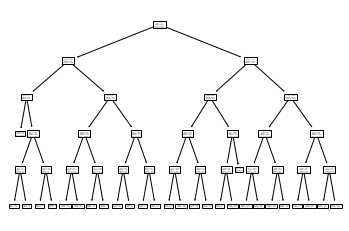

In [296]:
from sklearn.tree import plot_tree

plot_tree(tree2)


## Seleccion de mejor modelo

In [307]:
data = {
    'Model' : ['SVC', 
               'SVC _2', 
               'Decision Tree',
               'Decision Tree_2'],
        
    'AUC' : [recall_svc_1, recall_svc_2, recall_tree_1, recall_tree_2]
}



In [308]:
df_score = pd.DataFrame(data)

In [309]:
df_score.sort_values('AUC')

,Model,AUC
1,SVC _2,0.113336
0,SVC,0.241159
2,Decision Tree,0.243715
3,Decision Tree_2,0.243715


## Tuning u Optimizacion del modelo

Una vez teniendo el modelo ganador pasamos a optimizar sus hiperparametros. Hay varias tecnicas para esto como el GridSearchCV, RandomGridSearch y BayesianGridSearch.

In [314]:
from sklearn.model_selection import GridSearchCV

# parameters = {'penalty' : ('l1', 'l2'), 
#              'C': np.linspace(1, 10, 10)}

# svc_l = LinearSVC()

parameters = {'criterion' :['gini','entropy'],
              'max_depth' : np.linspace(1,10,10)}

tree_op = tree.DecisionTreeClassifier()

In [ ]:
"""
clf = GridSearchCV(svc_l, 
                   parameters,
                   scoring = 'recall',
                   verbose = 4)
"""

In [315]:
clf = GridSearchCV(tree_op, 
                   parameters,
                   scoring = 'recall',
                   verbose = 4)

In [316]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....criterion=gini, max_depth=1.0;, score=0.000 total time=   0.1s
[CV 2/5] END .....criterion=gini, max_depth=1.0;, score=0.000 total time=   0.1s
[CV 3/5] END .....criterion=gini, max_depth=1.0;, score=0.000 total time=   0.1s
[CV 4/5] END .....criterion=gini, max_depth=1.0;, score=0.000 total time=   0.1s
[CV 5/5] END .....criterion=gini, max_depth=1.0;, score=0.000 total time=   0.1s
[CV 1/5] END .....criterion=gini, max_depth=2.0;, score=0.145 total time=   0.1s
[CV 2/5] END .....criterion=gini, max_depth=2.0;, score=0.128 total time=   0.1s
[CV 3/5] END .....criterion=gini, max_depth=2.0;, score=0.118 total time=   0.1s
[CV 4/5] END .....criterion=gini, max_depth=2.0;, score=0.131 total time=   0.1s
[CV 5/5] END .....criterion=gini, max_depth=2.0;, score=0.137 total time=   0.1s
[CV 1/5] END .....criterion=gini, max_depth=3.0;, score=0.238 total time=   0.1s
[CV 2/5] END .....criterion=gini, max_depth=3.0

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             scoring='recall', verbose=4)

In [317]:
clf.best_score_

0.25427027027027027

In [318]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4.0}

In [322]:
ans = np.array(clf.cv_results_['mean_test_score'].reshape(10,2))

ans

array([[0.        , 0.13189189],
       [0.22551351, 0.25427027],
       [0.25372973, 0.25405405],
       [0.25362162, 0.25340541],
       [0.25275676, 0.25308108],
       [0.        , 0.13189189],
       [0.22551351, 0.25427027],
       [0.25372973, 0.25383784],
       [0.25394595, 0.25351351],
       [0.25275676, 0.25308108]])

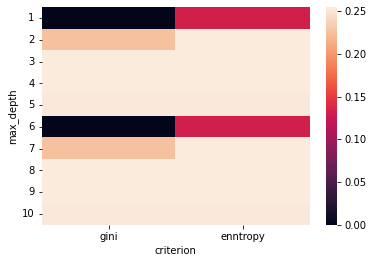

In [327]:
plt.figure()
sns.heatmap(ans.reshape(10,2), xticklabels=['gini','enntropy'], yticklabels=[1,2,3,4,5,6,7,8,9,10])
plt.ylabel("max_depth")
plt.xlabel("criterion")
plt.yticks(rotation=0);

Con esto podemos ver que el mejor modelo es un árbol de decisión con *X_train2*, ya que es el que nos da un mejor resultado de la métrica *Recall* que es la de nuestro interés.

## ROC curve and Precision-Recall curve

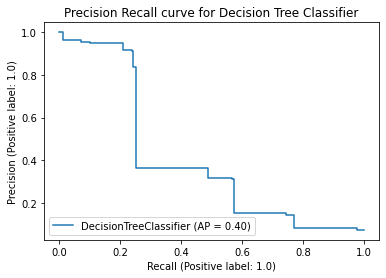

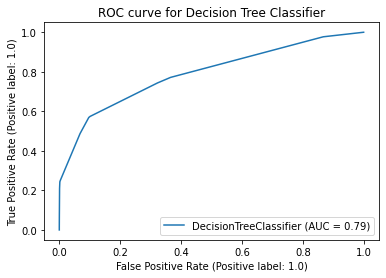

In [330]:
curve_pr = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name = 'DecisionTreeClassifier'
)
curve_pr = curve_pr.ax_.set_title('Precision Recall curve for Decision Tree Classifier')

roc = RocCurveDisplay.from_estimator(
    clf, X_test, y_test, name = 'DecisionTreeClassifier'
)
roc = roc.ax_.set_title('ROC curve for Decision Tree Classifier')

## Próximamente: Aplicar Undersapling y Oversampling

